### import das libs principais

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

### Rodando a base

In [20]:
data_frame_heart = pd.read_csv('../base/heart.csv')

## Criando Pipeline

In [21]:

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def pipeline(modelo):
    # Variables define
    numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    binary_features = ['Sex', 'ExerciseAngina']
    nominal_features = ['ChestPainType', 'RestingECG']
    ordinal_features = ['ST_Slope']

    # create the steps to be executed

    """This is done by creating a list of tuples, where each tuple contains a key and
    an instance to be executed."""

    numeric_transformer = Pipeline(steps=[('Encoder', RobustScaler())])
    binary_transformer = Pipeline(steps = [('Encoder', OrdinalEncoder())])
    nominal_transformer = Pipeline(steps = [('Encoder', OneHotEncoder(handle_unknown='ignore'))])
    ordinal_transformer = Pipeline(steps = [('Encoder', OrdinalEncoder(categories=[['Up', 'Flat', 'Down']]))])

    # Combining Everything

    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                   ('bin', binary_transformer, binary_features),
                                                   ('nom', nominal_transformer, nominal_features),
                                                   ('ord', ordinal_transformer, ordinal_features)])

    return Pipeline(steps=[('preprocessor', preprocessor), ('DT', modelo)])

### Primeiros Dados

In [22]:
data_frame_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Ultimos dados

In [23]:
data_frame_heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### Informações Gerais

In [24]:
data_frame_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Análise Descritiva

In [25]:
data_frame_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Alguns gráficos

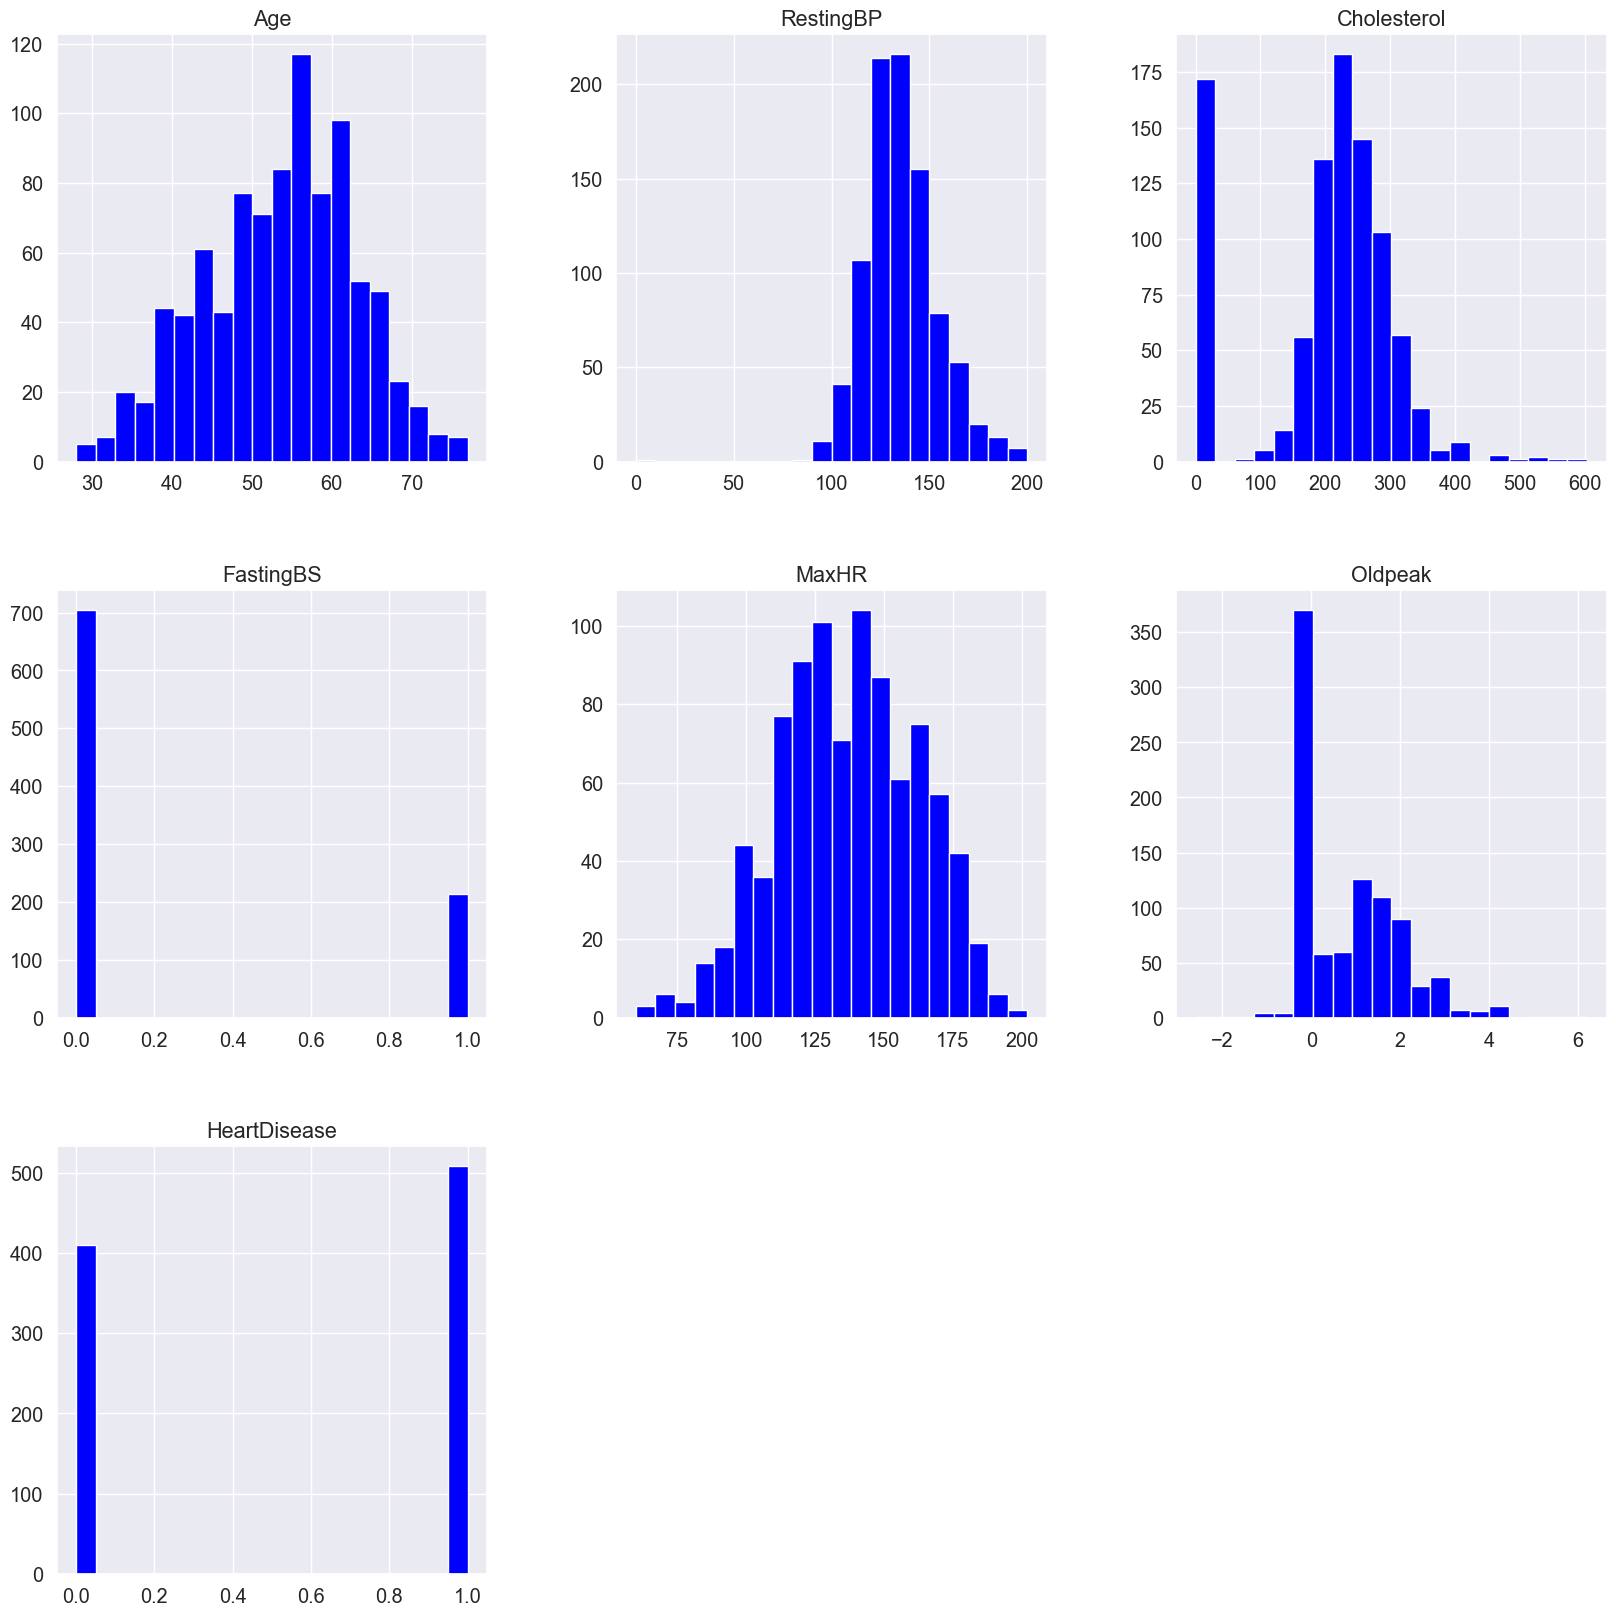

In [26]:
snb.set_theme(font_scale=1.3, rc={'figure.figsize': (20, 20)})
eixo = data_frame_heart.hist(bins=20, color='blue')

<Axes: xlabel='HeartDisease', ylabel='Age'>

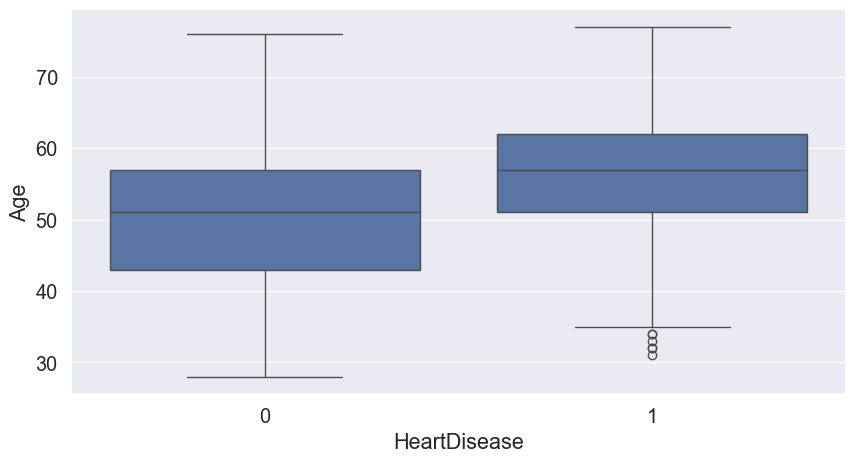

In [27]:
plt.figure(figsize=(10, 5))
snb.boxplot(data=data_frame_heart, x='HeartDisease', y='Age')

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

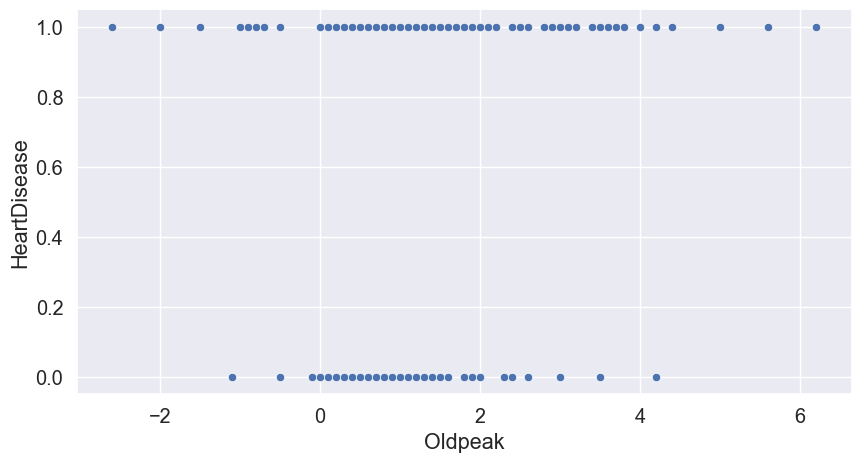

In [28]:
plt.figure(figsize=(10, 5))
snb.scatterplot(data=data_frame_heart, x='Oldpeak', y='HeartDisease')

### Aplicando modelo

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as treinoteste

x_caracteristicas = data_frame_heart.iloc[:, :11]
y_previsor = data_frame_heart.iloc[:, 11]


* Gerando variáveis de treinamento

In [30]:
x_treino, x_teste, y_treino, y_teste = treinoteste(x_caracteristicas, y_previsor, test_size=0.6)

* Treinando modelo

In [31]:
svm_model = pipeline(SVC(kernel='rbf'))
svm_model.fit(x_caracteristicas, y_previsor)

,steps,"[('preprocessor', ...), ('DT', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


* Realizamdo previsões

In [32]:
previssoes = svm_model.predict(x_teste)

In [33]:
previssoes

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

### Avaliando modelo

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, previssoes)

array([[229,  39],
       [ 15, 268]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previssoes))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       268
           1       0.87      0.95      0.91       283

    accuracy                           0.90       551
   macro avg       0.91      0.90      0.90       551
weighted avg       0.90      0.90      0.90       551



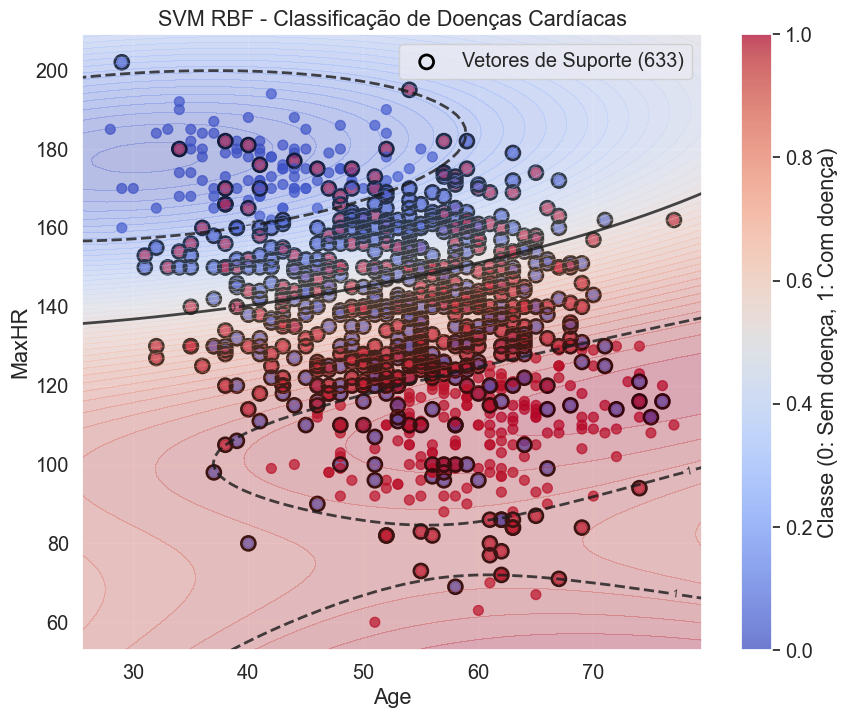

Número de vetores de suporte: 633
Acurácia no conjunto completo: 0.682


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification



# Função para plotar o gráfico
def plot_svm(clf, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)

    # Plotar os vetores de suporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    # Criar grade para os hiperplanos
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Criar grid
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plotar hiperplano de decisão e margens
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'], linewidths=2)
    plt.legend()
    plt.title('SVM com Hiperplano e Vetores de Suporte')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_svm(svm_model["DT"], x_caracteristicas, y_previsor)